In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# pip install optuna

# New Section

In [35]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
# import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from textblob import TextBlob
# from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
# from sklearn.linear_model import LinearClassifier 
import numpy as np
from numpy import sign
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
!pip install optuna
import optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
def remove_nan_blank(df):
    # Remove rows with NaN values
    df = df.dropna()
    
    # Replace blank values with NaN
    df = df.replace('', np.nan)

    # Remove rows with NaN values
    df = df.dropna()
    
    return df


In [37]:
from sklearn.model_selection import train_test_split
path = "/content/smart_grid_stability_augmented.csv"
# Read the creditcard.csv file
data = pd.read_csv(path)
data = remove_nan_blank(data)

In [38]:
def getData(path):
  data = pd.read_csv(path)
  # data.dropna(inplace=True)
  data[data['stabf'] == 'stable'] = 1
  data[data['stabf'] == 'unstable'] = 0
  data['stabf'] = data['stabf'].astype(dtype='int64')
  # print(data.dtypes)
  # Split the data into features and target
  X = data.drop("stabf", axis=1)
  y = data["stabf"]

  # # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return x_train, y_train, x_test, y_test

In [62]:
def objective(trial, x, y):
    x, y = x, y
    C = trial.suggest_float("C", 1e-10, 1e10, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    degree = trial.suggest_int("degree", 1, 10)
    coef0 = trial.suggest_float("coef0", -1, 1)
    shrinking = trial.suggest_categorical("shrinking", [True, False])
    tol = trial.suggest_float("tol", 1e-5, 1e-1)
    max_iter = trial.suggest_int("max_iter", -1, 1000)
    decision_function_shape = trial.suggest_categorical("decision_function_shape", ["ovr", "ovo"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    random_state = trial.suggest_int("random_state", 0, 100)
    classifier_obj = sklearn.svm.SVC(C=C, kernel=kernel, degree=degree, coef0=coef0, 
                                     shrinking=shrinking, tol=tol, max_iter=max_iter, 
                                     decision_function_shape=decision_function_shape, 
                                     class_weight=class_weight, random_state=random_state)
    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

classifier_obj = sklearn.svm.SVC()

if __name__ == "__main__":
  study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
  # study.optimize(objective, n_trials=100)
  x_train, y_train, x_test, y_test = getData(path)
  func = lambda trial: objective(trial, x_train, y_train)
  study.optimize(func, n_trials=100)
  # To get the dictionary of parameter name and parameter values:
  print("Return a dictionary of parameter name and parameter values:",study.best_params)

  # To get the best observed value of the objective function:
  print("Return the best observed value of the objective function:",study.best_value)

  # To get the best trial:
  print("Return the best trial:",study.best_trial)

  # To get all trials:
  print("Return all the trials:", study.trials)

   



[I 2023-01-27 18:21:29,274] A new study created in memory with name: no-name-39821a7f-4588-4702-96c8-cdd8648fbf83
[I 2023-01-27 18:21:31,171] Trial 0 finished with value: 1.0 and parameters: {'C': 81286.78340770316, 'kernel': 'poly', 'degree': 5, 'coef0': -0.43783440887486225, 'shrinking': False, 'tol': 0.07828738860868521, 'max_iter': 468, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 23}. Best is trial 0 with value: 1.0.
[I 2023-01-27 18:21:36,657] Trial 1 finished with value: 1.0 and parameters: {'C': 8.498943431113284e-08, 'kernel': 'sigmoid', 'degree': 4, 'coef0': 0.7323027206571371, 'shrinking': True, 'tol': 0.04449999241385194, 'max_iter': 276, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 28}. Best is trial 0 with value: 1.0.
[I 2023-01-27 18:21:40,778] Trial 2 finished with value: 1.0 and parameters: {'C': 1.5664741577300012e-08, 'kernel': 'poly', 'degree': 7, 'coef0': -0.823774610028241, 'shrinking': True, 'tol': 0.043351206

Return a dictionary of parameter name and parameter values: {'C': 81286.78340770316, 'kernel': 'poly', 'degree': 5, 'coef0': -0.43783440887486225, 'shrinking': False, 'tol': 0.07828738860868521, 'max_iter': 468, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 23}
Return the best observed value of the objective function: 1.0
Return the best trial: FrozenTrial(number=0, state=TrialState.COMPLETE, values=[1.0], datetime_start=datetime.datetime(2023, 1, 27, 18, 21, 29, 514825), datetime_complete=datetime.datetime(2023, 1, 27, 18, 21, 31, 170345), params={'C': 81286.78340770316, 'kernel': 'poly', 'degree': 5, 'coef0': -0.43783440887486225, 'shrinking': False, 'tol': 0.07828738860868521, 'max_iter': 468, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 23}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None), 'kernel': CategoricalDistribution(choices=('

In [64]:
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
# from optuna.visualization import 

In [65]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study)

In [66]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study)

In [67]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study)

In [68]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
plot_param_importances(study)

In [69]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study)

In [70]:


# Add this line after training the final model with best parameters
classifier_obj.set_params(**study.best_params)

classifier_obj.fit(x_train, y_train)
y_pred = classifier_obj.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
report = sklearn.metrics.classification_report(y_test, y_pred)
print("\nClassification report:\n", report)




Accuracy on test set: 1.0000

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7678
           1       1.00      1.00      1.00      4322

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [71]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_C,params_class_weight,params_coef0,params_decision_function_shape,params_degree,params_kernel,params_max_iter,params_random_state,params_shrinking,params_tol,state
0,0,1.0,2023-01-27 18:21:29.514825,2023-01-27 18:21:31.170345,0 days 00:00:01.655520,8.128678e+04,None,-0.437834,ovr,5,poly,468,23,False,0.078287,COMPLETE
1,1,1.0,2023-01-27 18:21:31.173734,2023-01-27 18:21:36.657090,0 days 00:00:05.483356,8.498943e-08,None,0.732303,ovr,4,sigmoid,276,28,True,0.044500,COMPLETE
2,2,1.0,2023-01-27 18:21:36.660149,2023-01-27 18:21:40.778157,0 days 00:00:04.118008,1.566474e-08,None,-0.823775,ovr,7,poly,416,95,True,0.043351,COMPLETE
3,3,1.0,2023-01-27 18:21:40.780619,2023-01-27 18:21:53.360442,0 days 00:00:12.579823,4.214119e-10,None,-0.591047,ovr,9,sigmoid,643,78,True,0.087631,COMPLETE
4,4,1.0,2023-01-27 18:21:53.363213,2023-01-27 18:21:53.604295,0 days 00:00:00.241082,2.089774e+08,balanced,0.542667,ovr,7,sigmoid,250,37,False,0.037636,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.0,2023-01-27 18:26:11.787013,2023-01-27 18:26:12.047253,0 days 00:00:00.260240,1.040343e+09,None,-0.432111,ovr,3,sigmoid,576,84,True,0.092986,COMPLETE
96,96,1.0,2023-01-27 18:26:12.049982,2023-01-27 18:26:12.312443,0 days 00:00:00.262461,1.124506e+06,balanced,-0.220167,ovo,6,rbf,649,12,False,0.087902,COMPLETE
97,97,1.0,2023-01-27 18:26:12.314902,2023-01-27 18:26:13.538866,0 days 00:00:01.223964,2.374949e-02,None,-0.387924,ovr,2,sigmoid,881,16,False,0.095114,COMPLETE
98,98,1.0,2023-01-27 18:26:13.545387,2023-01-27 18:26:13.835196,0 days 00:00:00.289809,4.221529e+07,None,-0.674653,ovr,8,poly,132,32,True,0.085296,COMPLETE


In [72]:
type(study.trials_dataframe())
study.trials_dataframe().columns

Index(['number', 'value', 'datetime_start', 'datetime_complete', 'duration',
       'params_C', 'params_class_weight', 'params_coef0',
       'params_decision_function_shape', 'params_degree', 'params_kernel',
       'params_max_iter', 'params_random_state', 'params_shrinking',
       'params_tol', 'state'],
      dtype='object')

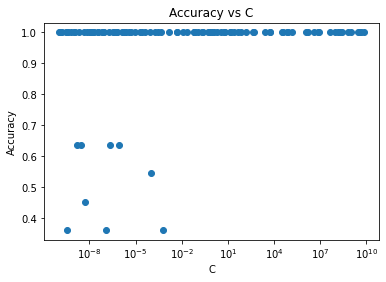

In [73]:
plt.scatter(study.trials_dataframe()['params_C'], study.trials_dataframe()['value'])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.show()

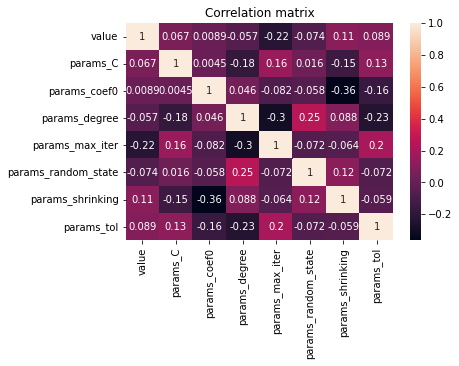

In [74]:
corr = study.trials_dataframe().drop(['number','datetime_start','datetime_complete','duration','state'], axis=1).corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation matrix")
plt.show()